# Reconstructing Data

*Low rank approximation singular value decomposition for image compression*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.linalg as la

In [2]:
def LowRankApprox(A,k): #Uses linalg svd to return an approximation to A of rank k
    
    # First, retrieve the SVD decomposition of A
    U, Sigma, Vadj = la.svd(A,full_matrices=False)
    
    # Take the vector of singular values, copy it, and kill all but the first k entries of the copy

    Sigma_cutoff = Sigma
    for i in range(len(Sigma)-k):
        Sigma_cutoff[k+i] = 0 #(Sigma_k in the notes)
            
    # Compute a new matrix using the cut-off singular values, and return it as value
    return np.dot(U*Sigma,Vadj) #This A_k = U times Sigma_k times V^* in our notes

In [3]:
def sz(k):
    return 1030*k+k+816*k

**Image to Approximate**

(1030, 816, 3)

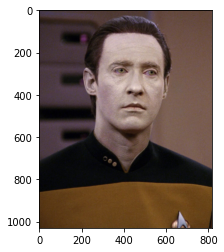

In [4]:
M = mpimg.imread('data.jpg') #Reads an RGB image, which is made out of 3 MxN matrices
picplot = plt.imshow(M)
M.shape

**Gray scale, so we don't have to think about the RGB values**

In [12]:
Mgs = np.mean(M, axis=2) #Create a grayscale image by averaging the colors of the 3 matrices
Mgs.shape
1030*816 #Original size of the grayscaled file

840480

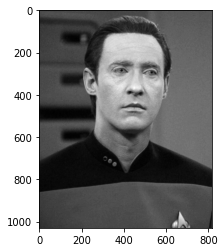

In [6]:
picplot = plt.imshow(Mgs, cmap = 'gray')

**VERY low rank approximation**

1847

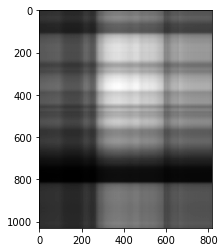

In [7]:
rank = 1 # Set the rank of your approximation
B = LowRankApprox(Mgs,rank) # Best rank k approximation to the grayscale image
picshow = plt.imshow(B,cmap ='gray') #Plot the image
sz(1)

**Can't see much of what's going on. Can maybe make out a face, image size is very small**

5541

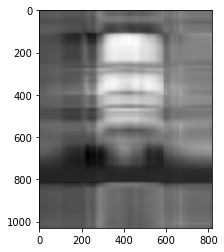

In [8]:
rank = 3
B = LowRankApprox(Mgs,rank)
picshow = plt.imshow(B,cmap ='gray')
sz(3)

**Better, can definetly see a face**

27705

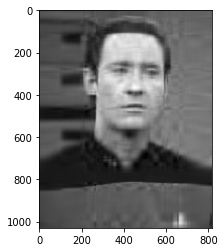

In [9]:
rank = 15
B = LowRankApprox(Mgs,rank)
picshow = plt.imshow(B,cmap ='gray')
sz(15)

**Looks like data, even if blurry. Size is still heavily compressed**

46175

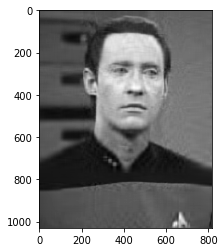

In [10]:
rank = 25
B = LowRankApprox(Mgs,rank)
picshow = plt.imshow(B,cmap ='gray')
sz(25)

147760

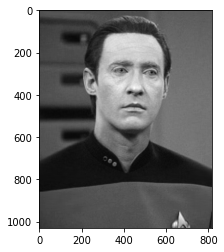

In [13]:
rank = 80
B = LowRankApprox(Mgs,rank)
picshow = plt.imshow(B,cmap ='gray')
sz(80)

**Can't determine the difference between these two images. Maybe slight bluring at the line formed on his uniform. We are about 1/8th the size of the original image.**

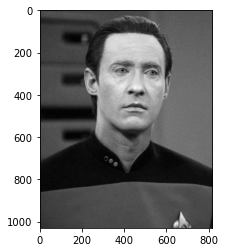

In [15]:
picshow = plt.imshow(Mgs,cmap ='gray') # Original image

Want to read more about this from other students? http://www.math.utah.edu/~gustafso/s2017/2270/projects-2016/kuhnConnor/kuhnConnor-svd-vs-dct-image-compression.pdf